In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Load dataset 
white = pd.read_csv("Datasets/winequality-white.csv")
red = pd.read_csv("Datasets/winequality-red.csv")

## Data Exploaration

In [3]:
white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [4]:
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
# red.head(0)
# white.tail(0)
# red.sample(5)
white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [6]:
# Double check for null values
# pd.isnull(white)
pd.isnull(red)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False


## Data Visualisation

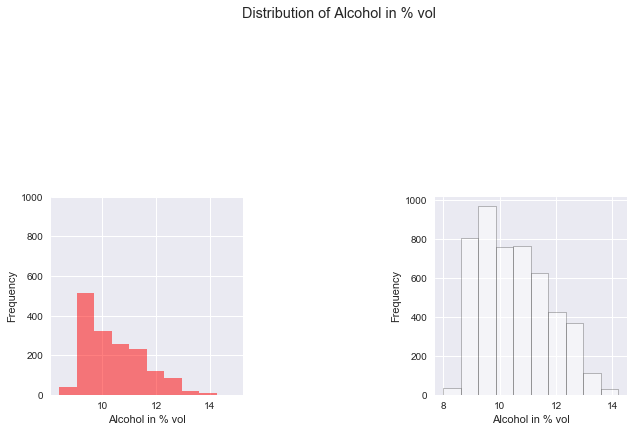

In [7]:
fig, ax = plt.subplots(1,2)
ax[0].hist(red.alcohol, 10, facecolor='red', alpha=0.5, label="Red wine")
ax[1].hist(white.alcohol, 10, facecolor='white', ec='black', lw=0.5, alpha=0.5, label="White wine")

fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=1)
ax[0].set_ylim([0, 1000])
ax[0].set_xlabel("Alcohol in % vol")
ax[0].set_ylabel("Frequency")
ax[1].set_xlabel("Alcohol in % vol")
ax[1].set_ylabel("Frequency")
fig.suptitle("Distribution of Alcohol in % vol")

plt.show()

In [8]:
np.histogram(red.alcohol, bins=[7,8,9,10,11,12,13,14,15])

(array([  0,   7, 673, 452, 305, 133,  21,   8]),
 array([ 7,  8,  9, 10, 11, 12, 13, 14, 15]))

In [9]:
np.histogram(white.alcohol, bins=[7,8,9,10,11,12,13,14,15])

(array([   0,  317, 1606, 1256,  906,  675,  131,    7]),
 array([ 7,  8,  9, 10, 11, 12, 13, 14, 15]))

**Sulphates**

Finding relation between the sulphates and the quality of wine. 
Suplhates can cause people to have headaches and because of that women especially don't want to drink wine. Maybe this this affects the ratings for the red wine? 

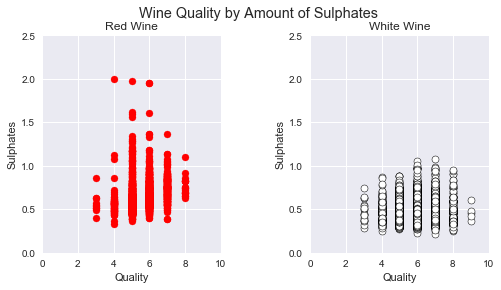

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].scatter(red['quality'], red["sulphates"], color="red")
ax[1].scatter(white['quality'], white['sulphates'], color="white", edgecolors="black", lw=0.5)

ax[0].set_title("Red Wine")
ax[1].set_title("White Wine")
ax[0].set_xlabel("Quality")
ax[1].set_xlabel("Quality")
ax[0].set_ylabel("Sulphates")
ax[1].set_ylabel("Sulphates")
ax[0].set_xlim([0,10])
ax[1].set_xlim([0,10])
ax[0].set_ylim([0,2.5])
ax[1].set_ylim([0,2.5])
fig.subplots_adjust(wspace=0.5)
fig.suptitle("Wine Quality by Amount of Sulphates")

plt.show()

White wine with a relatively low amount of sulphates that gets a score of 9, but for the rest it’s difficult to interpret the data correctly at this point

** Acidity **

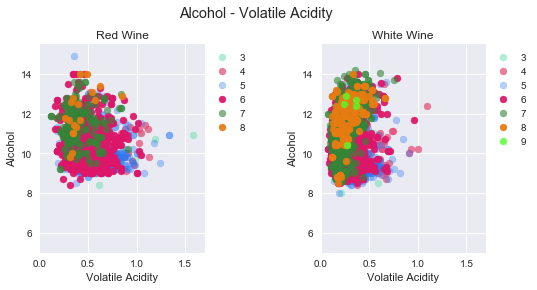

In [11]:
np.random.seed(570)
redlabels = np.unique(red['quality'])
whitelabels = np.unique(white['quality'])

fig, ax = plt.subplots(1,2, figsize=(8,4))
redcolors = np.random.rand(6,4)
whitecolors = np.append(redcolors, np.random.rand(1,4), axis=0)

for i in range(len(redcolors)):
    redy = red['alcohol'][red.quality == redlabels[i]]
    redx = red['volatile acidity'][red.quality == redlabels[i]]
    ax[0].scatter(redx, redy, c=redcolors[i])
for i in range(len(whitecolors)):
    whitey = white['alcohol'][white.quality == whitelabels[i]]
    whitex = white['volatile acidity'][white.quality == whitelabels[i]]
    ax[1].scatter(whitex, whitey, c = whitecolors[i])
    
ax[0].set_title('Red Wine')
ax[1].set_title('White Wine')

ax[0].set_xlim([0, 1.7])
ax[1].set_xlim([0, 1.7])
ax[0].set_ylim([5, 15.5])
ax[1].set_ylim([5, 15.5])

ax[0].set_xlabel('Volatile Acidity')
ax[0].set_ylabel('Alcohol')
ax[1].set_xlabel('Volatile Acidity')
ax[1].set_ylabel('Alcohol')

ax[0].legend(redlabels, loc='best', bbox_to_anchor=(1.3, 1))
ax[1].legend(whitelabels, loc='best', bbox_to_anchor=(1.3, 1))
fig.suptitle("Alcohol - Volatile Acidity")
fig.subplots_adjust(top=0.85, wspace=0.7)

plt.show()

For the white wine: most wines with label 8 have volatile acidity levels of 0.5 or below, but whether or not it has an effect on the quality is too difficult to say, since all the data points are very densely packed towards one side of the graph. 

** Observations **

1. Some of the variables in the datasets have values that are considerably far apart.
2. There are no null values in the dataset. 
3. Most wines that were included in the data set have around 9% alcohol.
4. Red wine seems to contain more sulphate than the white wine, which has less sulphates above 1g/dm3. 
5. There is no direct relation between volatile acidity to the quality of the wine. 

## Data Preprocessing

In [12]:
# Add 'type' column to 'red' with value 1
red['type'] = 1

# Add 'type' column to 'white' with value 0
white['type'] = 0

wines = red.append(white, ignore_index = True)

Set `ignore_index` to `True` in this case because you don’t want to keep the index labels of white when you’re appending the data to red.

In [13]:
wines.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,1
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,1
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,1


** Find Correlation Matrix ** 

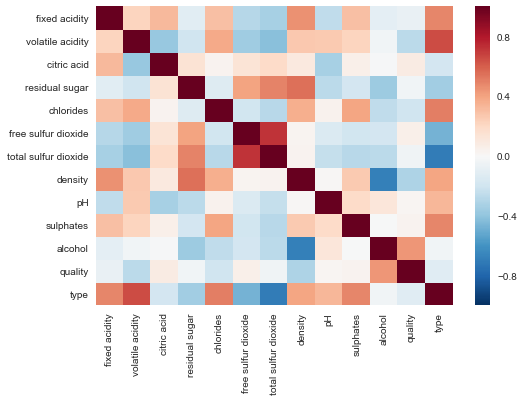

In [14]:
corr = wines.corr()
sns.heatmap(corr,
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values)
sns.plt.show()

** Insights ** 

1. There is a correlation between density and residual sugar.
2. Volatile acidity and type are closely correlated. 
3. As expected free sulphur dioxide and total sulphur dioxide are correlated. 

### Train - Test split 

In [15]:
# Specify the data
X = wines.iloc[:, 0:11]

# Specify the target labels and flatten the array
y = np.ravel(wines.type)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

1. `ravel` is used to flatten the array of target labels in the same datatype and to be totally ready to use the `X` & `y` variables as input for the `train_test_split()` function.  
2. `random_state` is used so that no matter how many times you execute your code the result would be the same .i.e, same values in train and test datasets. 

### Standardize the data

The idea behind `StandardScaler` is that it will transform your data such that its distribution will have a mean value 0 and standard deviation of 1.

In [16]:
# Define the scaler
scaler = StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Model Building 

In [17]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

# Add an input layer
model.add(Dense(12, activation='relu', input_shape=(11,)))

# Add one hidden layer
model.add(Dense(8, activation='relu'))

# Add an output layer
model.add(Dense(1, activation='sigmoid'))

/anaconda/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [18]:
# model.get_config()
# model.get_weights()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                144       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________


** Compile and Fit ** 

Compile the model and fit the model to the data.

In [19]:
model.compile(loss = 'binary_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

model.fit(X_train, y_train, epochs=20, batch_size=1, verbose=1)

Epoch 1/20
4352/4352 [==============================] - 8s 2ms/step - loss: 0.0899 - acc: 0.9690
Epoch 2/20
4352/4352 [==============================] - 7s 2ms/step - loss: 0.0221 - acc: 0.9959
Epoch 3/20
4352/4352 [==============================] - 10s 2ms/step - loss: 0.0194 - acc: 0.9966
Epoch 4/20
4352/4352 [==============================] - 7s 2ms/step - loss: 0.0166 - acc: 0.9970
Epoch 5/20
4352/4352 [==============================] - 7s 2ms/step - loss: 0.0151 - acc: 0.9975
Epoch 6/20
4352/4352 [==============================] - 7s 2ms/step - loss: 0.0141 - acc: 0.9972
Epoch 7/20
4352/4352 [==============================] - 7s 2ms/step - loss: 0.0134 - acc: 0.9972
Epoch 8/20
4352/4352 [==============================] - 7s 2ms/step - loss: 0.0152 - acc: 0.9972
Epoch 9/20
4352/4352 [==============================] - 7s 2ms/step - loss: 0.0117 - acc: 0.9975
Epoch 10/20
4352/4352 [==============================] - 8s 2ms/step - loss: 0.0109 - acc: 0.9975
Epoch 11/20
4352/4352 [=====

In [27]:
# Predict Values
y_pred = model.predict(X_test)

# We have to use threshold for our continuous values
y_pred = y_pred >= 0.13

### Evaluate Model

In [28]:
score = model.evaluate(X_test, y_test, verbose=1)
score

2145/2145 [==============================] - 0s 24us/step


[0.027393498267249954, 0.9944055944055944]

In [29]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score

confusion_matrix(y_test, y_pred)

array([[1585,    3],
       [   9,  548]])

In [30]:
# Precision : measure of a classifier’s exactness

precision_score(y_test, y_pred)

0.9945553539019963

In [31]:
# Recall : measure of a classifier’s completeness

recall_score(y_test, y_pred)

0.9838420107719928

In [32]:
# F1 score : weighted average of precision and recall

f1_score(y_test, y_pred)

0.9891696750902527

In [33]:
# Kappa or Cohen's kappa : classification accuracy normalized by the imbalance of the classes in the data

cohen_kappa_score(y_test, y_pred)

0.9853986111095354

## Predicting Wine Quality

Here we'll be using `quality` as our target variable. 

In [34]:
# Isolate target labels
y1 = wines.quality

# Isolate data
X1 = wines.drop('quality', axis=1)

In [36]:
# Scaling of the data
X1 = StandardScaler().fit_transform(X1)

### Model Neural Network Architecture

1. This time we'll use our model for regression task, the architecture could look very much the same, with two `Dense` layers.
2. First layer is the input layer where we pass the shape of our input data to it. We'll use `input_dim` to pass the dimensions of the input data to the `Dense` layer.

3. In input layer we have `64` hidden units, 12 input dimensions and again we'll be using `relu` activation function (without bias involved).

4. The output layer doesn't include an activation and ends with single unit `Dense(1)`. This is a typical setup for scalar regression, where we are trying to predict a single continuous value. 

In [37]:
# Initialize the model
model_1 = Sequential()

# Add input layer
model_1.add(Dense(64, input_dim=12, activation='relu'))

# Add output layer
model_1.add(Dense(1))

### Compile the model and Fit the Data

Since we're using K-Fold validation partitions:

In [41]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

seed = 7
np.random.seed(seed)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
for train, test in kfold.split(X1, y1):
    model_1 = Sequential()
    model_1.add(Dense(64, input_dim=12, activation='relu'))
    model_1.add(Dense(1))
    model_1.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    model_1.fit(X1[train], y1[train], epochs=10, verbose=1)

Epoch 1/10
5195/5195 [==============================] - 1s 134us/step - loss: 14.2525 - mean_absolute_error: 3.3449
Epoch 2/10
5195/5195 [==============================] - 0s 38us/step - loss: 1.6624 - mean_absolute_error: 1.0017
Epoch 3/10
5195/5195 [==============================] - 0s 36us/step - loss: 1.0360 - mean_absolute_error: 0.7852
Epoch 4/10
5195/5195 [==============================] - 0s 35us/step - loss: 0.7779 - mean_absolute_error: 0.6786
Epoch 5/10
5195/5195 [==============================] - 0s 35us/step - loss: 0.6440 - mean_absolute_error: 0.6186
Epoch 6/10
5195/5195 [==============================] - 0s 48us/step - loss: 0.5850 - mean_absolute_error: 0.5912
Epoch 7/10
5195/5195 [==============================] - 0s 47us/step - loss: 0.5510 - mean_absolute_error: 0.5771
Epoch 8/10
5195/5195 [==============================] - 0s 48us/step - loss: 0.5262 - mean_absolute_error: 0.5648
Epoch 9/10
5195/5195 [==============================] - 0s 44us/step - loss: 0.5125 - 